In [1]:
filename = '2-spiral.txt'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.') or (ch == '-'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

print(datapoints)

[[1.5, 0.0], [1.50973, 0.028461], [1.51892, 0.057289], [1.52755, 0.086473], [1.53562, 0.116003], [1.54312, 0.145868], [1.55003, 0.176056], [1.55635, 0.206556], [1.56207, 0.237356], [1.56717, 0.268445], [1.57166, 0.29981], [1.57552, 0.331439], [1.57873, 0.363319], [1.58131, 0.395437], [1.58323, 0.42778], [1.58448, 0.460335], [1.58508, 0.493089], [1.58499, 0.526027], [1.58422, 0.559137], [1.58277, 0.592403], [1.58062, 0.625812], [1.57777, 0.659349], [1.57421, 0.692999], [1.56995, 0.726748], [1.56497, 0.760581], [1.55926, 0.794483], [1.55283, 0.828439], [1.54567, 0.862433], [1.53778, 0.896449], [1.52916, 0.930473], [1.51979, 0.964488], [1.50968, 0.998479], [1.49883, 1.03243], [1.48723, 1.06632], [1.47488, 1.10015], [1.46179, 1.13388], [1.44794, 1.16751], [1.43334, 1.20101], [1.41799, 1.23438], [1.40189, 1.2676], [1.38504, 1.30064], [1.36744, 1.3335], [1.34909, 1.36615], [1.32999, 1.39858], [1.31015, 1.43078], [1.28956, 1.46272], [1.26823, 1.49439], [1.24616, 1.52577], [1.22336, 1.55685], 

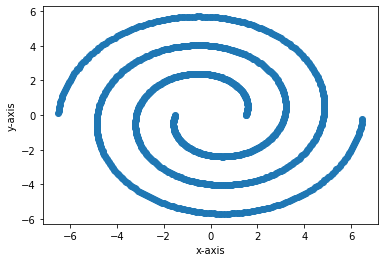

In [3]:
import matplotlib.pyplot as plt 

x_arr = []
y_arr = []

for point in datapoints:
    x_arr.append(point[0])
    y_arr.append(point[1])

plt.scatter(x_arr, y_arr) 
# plt.scatter(num_clusters, sse, c = 'red', marker = 'x')

plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

# plt.title('SSE vs num of clusters') 

plt.show() 


In [4]:
import math
def distance(point_a,point_b):
    sum = 0
    for i in range(len(point_a)):
        sum += (point_a[i]-point_b[i])**2
    
    return math.sqrt(sum)

In [5]:
def get_core_points(epsilon,min_pts):
    core_points = []

    for point_a in datapoints:
        neighbors = []
        for point_b in datapoints:
            if distance(point_a,point_b) < epsilon:
                neighbors.append(point_b)

        if len(neighbors) > min_pts:
            core_points.append(point_a)
    
    return core_points

In [6]:
def density_connected(core_point,cluster_index,cluster_id,core_points):
    neighbors = []
    for point_a in datapoints:
        if (distance(point_a,core_point) < epsilon) and (point_a != core_point):
            neighbors.append(point_a)
    
    for y in neighbors:
        if cluster_id[tuple(y)] == -1:
#             print('neighbor:' + str(y))
            cluster_id[tuple(y)] = cluster_index
            if y in core_points:
#                 print('is core point')
                density_connected(y,cluster_index,cluster_id,core_points)
            
    

In [7]:
def assign_clusters(core_points):
    cluster_id = {}

    for point in datapoints:
        cluster_id[tuple(point)] = -1

    cluster_index = 0

    for point in core_points:
#         print('point:' + str(point))
        if cluster_id[tuple(point)] == -1:
            cluster_index += 1
            cluster_id[tuple(point)] = cluster_index
            density_connected(point,cluster_index,cluster_id,core_points)
    
    return cluster_id

In [8]:
def create_clusters(cluster_id):
    clusters = {}
    for point in datapoints:
        if cluster_id[tuple(point)] not in clusters.keys():
            clusters[cluster_id[tuple(point)]] = []
            clusters[cluster_id[tuple(point)]].append(point)
        else:
            clusters[cluster_id[tuple(point)]].append(point)
    
    return clusters

In [9]:
def perform_dbscan(epsilon,min_pts):
    core_points = get_core_points(epsilon,min_pts)
    cluster_id = assign_clusters(core_points)
    clusters = create_clusters(cluster_id)
    return clusters

In [10]:
def calculate_sse(useful_clusters):
    sse = 0
    for index in useful_clusters:
        temp_cluster = useful_clusters[index]
        dimension = len(temp_cluster[0])
        temp_sum = []
        for i in range(dimension):
            temp_sum.append(0)
        
        for point in temp_cluster:
            for j in range(dimension):
                temp_sum[j] += point[j]
        
        temp_mean = []
        
        for j in range(dimension):
            temp_mean.append(temp_sum[j]/len(temp_cluster))
        
        
        diff = 0
        
        for point in temp_cluster:
            diff = 0
            for j in range(dimension):
                diff += temp_mean[j] - point[j]
            
            sse += diff**2
        
    return sse
            

In [11]:
import time

epsilon = 0.6
min_pts = 10

start = time.time()

final_clusters = perform_dbscan(epsilon,min_pts)

end = time.time()

useful_clusters = {}
noise = {}
for c in final_clusters:
    if c == -1:
        noise = final_clusters[c]
    else:
        useful_clusters[c] = final_clusters[c]

sse = calculate_sse(useful_clusters)
print(sse)
print('Number of clusters:' + str(len(useful_clusters)))
print('Number of noise points:' + str(len(noise)))
print('time taken:' + str(end-start))

14374.854645001295
Number of clusters:2
Number of noise points:23
time taken:2.3207907676696777


In [ ]:
len